### Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

#### Instructions
* Get the numerical variables from our dataset.
* Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
* Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
#loading dataframe
main_df = pd.read_csv('../lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
main_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
main_df.columns = main_df.columns.str.lower()
main_df.columns = main_df.columns.str.replace(' ', '_')

In [4]:
num = main_df.select_dtypes(np.number)
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


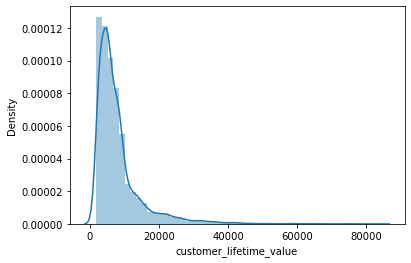

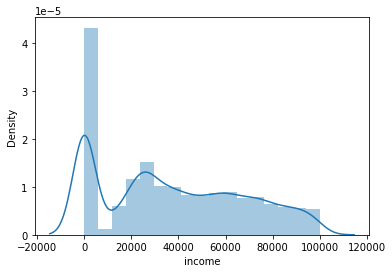

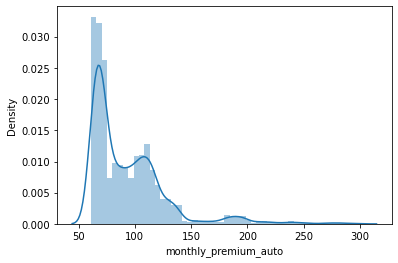

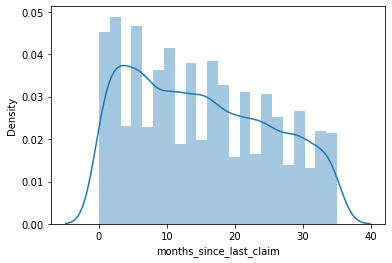

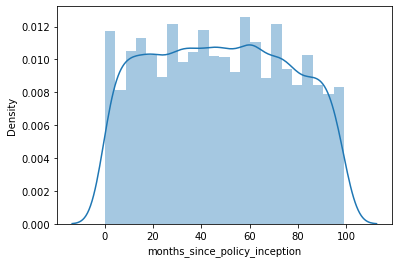

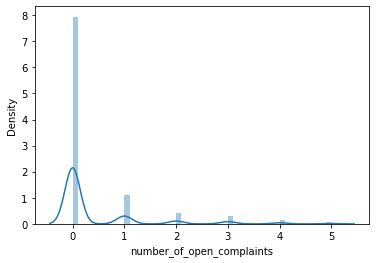

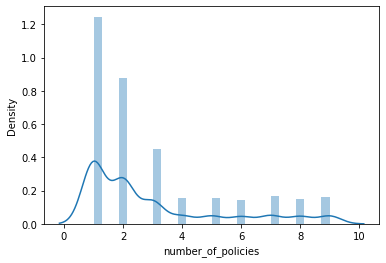

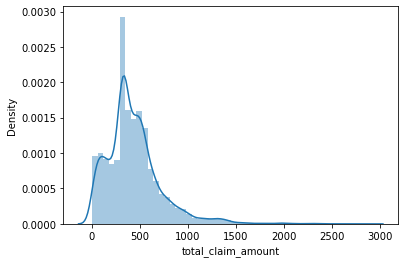

In [8]:
for column in num.select_dtypes(np.number).columns:
    sns.distplot(num[column])
    plt.show()

### Log

In [18]:
import math

def log_transform2(x):
    if np.isfinite(x) and x!=0:
        return math.log10(x)
    else:
        return np.NAN

In [19]:
def log_scaled(df):
    numeric_cols = df.select_dtypes(np.number).columns
    for column in numeric_cols:
        df[column] = df[column].apply(log_transform).fillna(df[column].mean()) 
    return df

In [20]:
num = log_scaled(num)

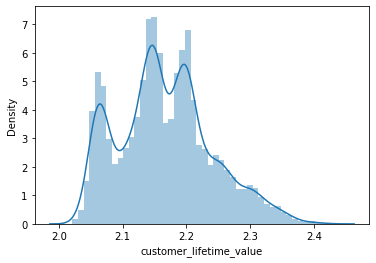

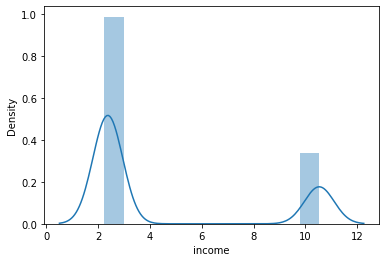

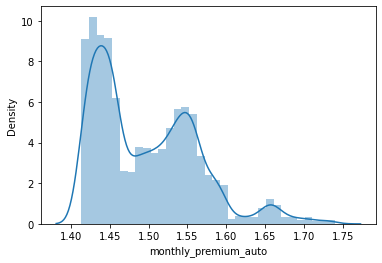

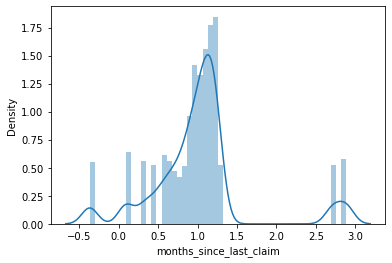

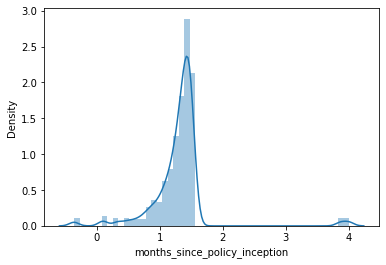

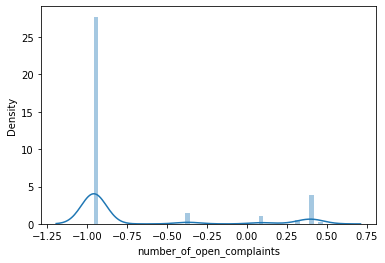

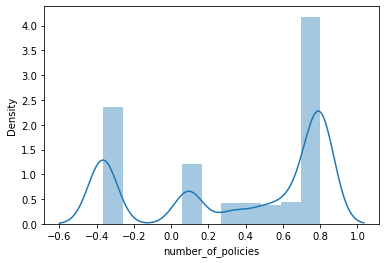

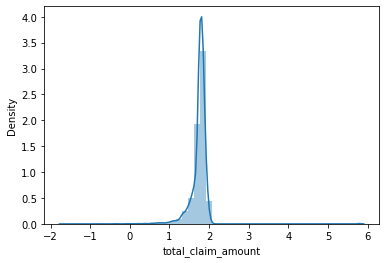

In [21]:
for column in num.select_dtypes(np.number).columns:
    sns.distplot(num[column])
    plt.show()

### Min-Max Scaler

In [14]:
min_max = num.copy()

In [15]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(min_max)
x_min_max = transformer.transform(min_max)

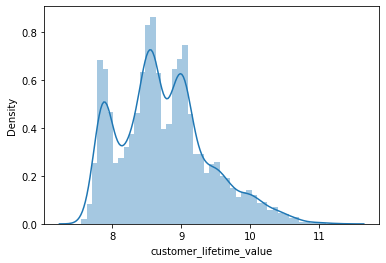

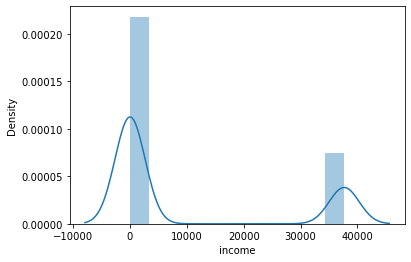

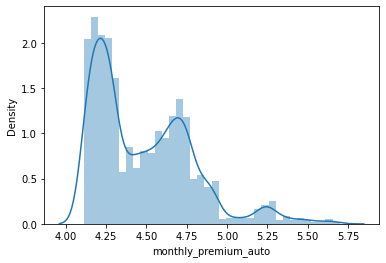

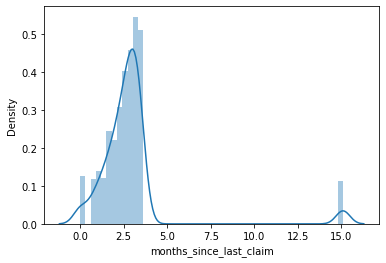

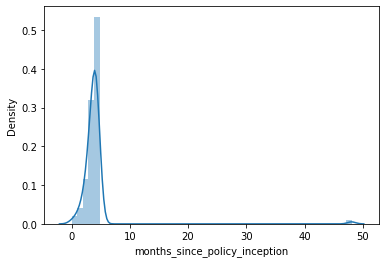

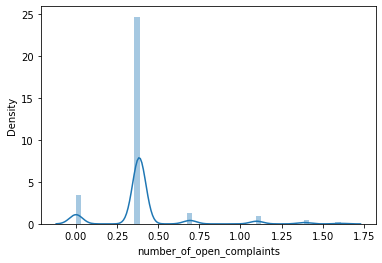

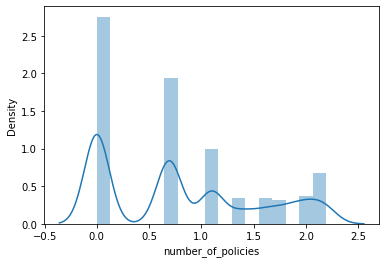

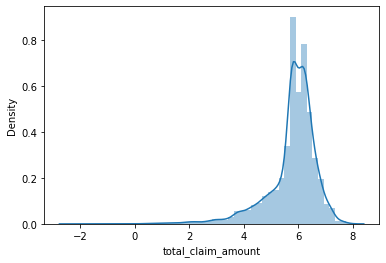

In [16]:
for column in min_max.select_dtypes(np.number).columns:
    sns.distplot(min_max[column])
    plt.show()